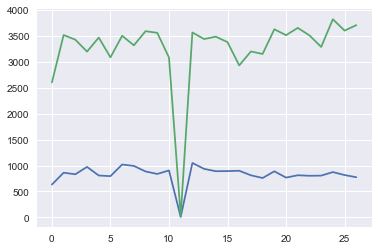

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("KaggleV2-May-2016.csv")
df["No-show"].value_counts()

df["Count"]=1
df["AppointmentDay"]=df["AppointmentDay"].apply(lambda x:int(x[4:10].replace("-","")) )
df_no = df[df["No-show"]=="No"]
df_yes = df[df["No-show"]=="Yes"]

df_no_sum = df_no.groupby("AppointmentDay",as_index=False).sum()
df_yes_sum = df_yes.groupby("AppointmentDay",as_index=False).sum()
df_yes_sum.index
plt.plot(df_yes_sum.index,df_yes_sum["Count"])
plt.plot(df_no_sum.index,df_no_sum["Count"])

In [2]:
feature_dframe = pd.DataFrame()
feature_dframe['Age'] = df['Age']
feature_dframe['Patientld'] = df['PatientId']
feature_dframe['AppointmentID'] = df['AppointmentID']
feature_dframe['Gender'] = df['Gender'].apply(lambda g:1 if g == 'M' else 0)
feature_dframe['SMS_received'] = df['SMS_received']
feature_dframe['Handcap'] = df['Handcap']
feature_dframe['Alcoholism'] = df['Alcoholism']
feature_dframe['Diabetes'] = df['Diabetes']
feature_dframe['Hipertension'] = df['Hipertension']
feature_dframe['Scholarship'] = df['Scholarship']
feature_dframe['No-show'] = df['No-show'].apply(lambda g:1 if g == 'Yes' else 0)

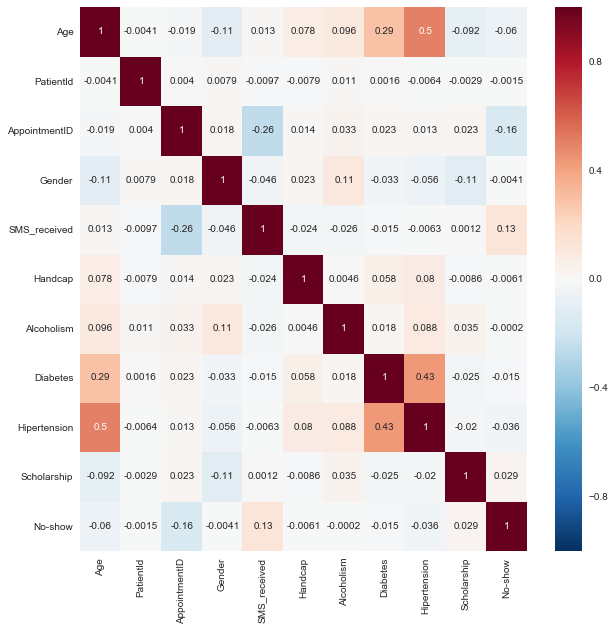

In [3]:
plt.figure(figsize=(10,10))
sns.heatmap(feature_dframe.corr(),annot=True)

In [4]:
from sklearn.model_selection import ShuffleSplit

X=feature_dframe.drop('No-show',axis=1)
y=feature_dframe['No-show'] 



In [5]:
from sklearn.model_selection import ShuffleSplit

X=np.array(feature_dframe.drop('No-show',axis=1))
y=feature_dframe['No-show'] 

ss = ShuffleSplit(n_splits=1,
                  train_size=0.7,
                  test_size=0.3,
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=15,criterion="entropy", random_state=0)
clf.fit(X_train,y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.82070106504
0.800054283905


In [6]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth=15, criterion='entropy',random_state=0)
tree_clf.fit(X_train,y_train)

print(tree_clf.score(X_train, y_train))
print(tree_clf.score(X_test, y_test))

0.826426946541
0.787388039446
